Bibliotecas usadas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

Gerando os limiares de um espaço amostral.

A população de origem da amostra possui uma distribuição normal de limiares entre seus agentes.

In [17]:
def cria_thresholds(N = 100, a = True, media = 25, desvio_padrao = 10):
    """
    Parâmetros do espaço amostral:
      N := número total de agentes
      a := se a == True os limiares menores que 0 se tornam 0 e os maiores que 100 se tornam 100, caso contrário nada acontece

    Parâmetros da distribuição gaussiana:
      média
      desvio padrão
      
    Retorna um np.array com os thresholds de todos os agentes de forma ordenada
    
    """
    thresholds = np.array([])
    
    # gerando os limiares
    for i in range(N):
        limiar = rd.gauss(media, desvio_padrao)     # gera número aleatório numa distribuição normal

        if a:
            # todos os thresholds negativos se tornam 0 e todos aqueles maiores que 100 se tornam 100 (por coerência com a teoria)
            if limiar < 0:
                limiar = 0
            elif limiar > 100:
                limiar = 100

        thresholds = np.append(thresholds, limiar)
        
    thresholds = sorted(thresholds) #ordena o array de thresholds
    
    return thresholds

Plot de dada amostra da população para dados parâmetros iniciais

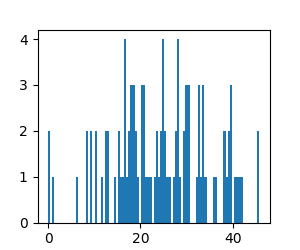

In [16]:
N = 100            # número de agentes
a = True           # thresholds negativos se tornam 0
media = 25         # média da distribuição normal
desvio_padrao = 10 # desvio padrão da distribuição normal

thresholds = np.array([])
thresholds = cria_thresholds(N,a,media,desvio_padrao)

# plot
plt.figure(figsize=(3,2.5))
plt.hist(thresholds,100)
plt.show()

Cálculo do tamanho final da greve

In [4]:
def simula_greve(thresholds):
    """
    thresholds := array com os thresholds de todos os agentes
    
    Retorna um np.array "resposta" com duas entradas:
        resposta[0] := um array com a evolução da greve ao longo do tempo
        resposta[1] := tamanho final da greve
    
    """
    
    tamanho_da_greve = 0
    progressao = np.array([0])    # array que acumula a evolução temporal da greve
    aux = 0
    
    while True:
        for i in range(len(thresholds)):
            if thresholds[i] <= tamanho_da_greve: # verifica os thresholds de todas os agentes e conta quantos entram para a greve
                aux += 1
        progressao = np.append(progressao, aux)
        if tamanho_da_greve == aux:   # caso o tamanho da greve não mude de um passo temporal para outro ela está estável
            break
        tamanho_da_greve = aux
        aux = 0
    return [progressao, tamanho_da_greve]

Plot da evolução de uma greve

100


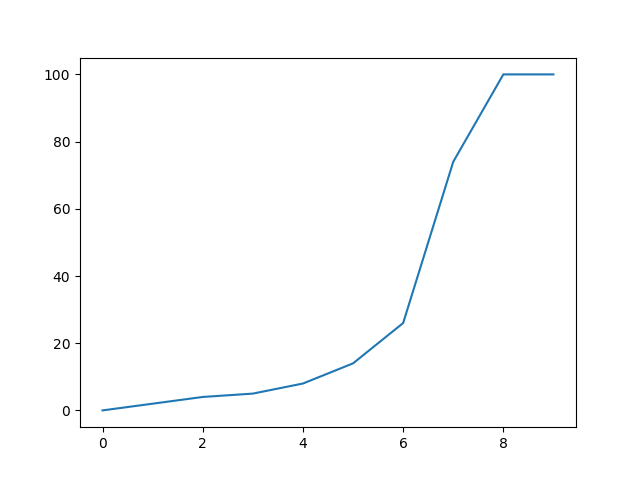

In [5]:
N = 100            # número de agentes
a = True           # thresholds negativos se tornam 0
media = 20         # média da distribuição normal
desvio_padrao = 10 # desvio padrão da distribuição normal

thresholds = np.array([])
thresholds = cria_thresholds(N,a,media,desvio_padrao)
greve = simula_greve(thresholds)
evolucao = greve[0]
tamanho = greve[1]

print(tamanho)
plt.figure()
plt.plot(evolucao)
plt.show()

Média do tamanho das greves para certos dados iniciais

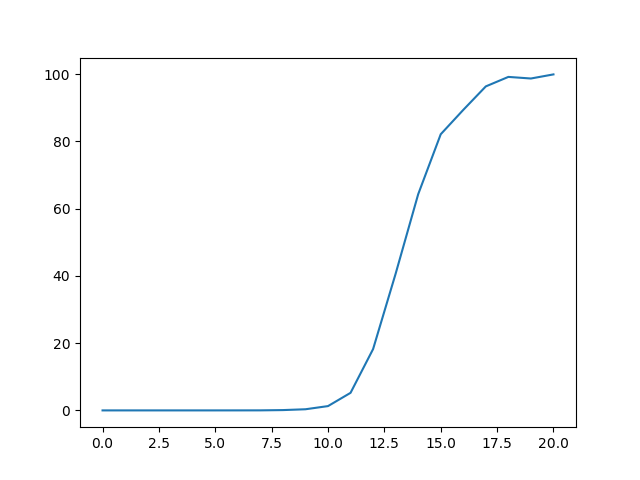

In [9]:
N = 100            # número de agentes
a = True           # thresholds negativos se tornam 0
media = 25         # média da distribuição normal

desvios_padroes = np.arange(0,21) # desvios padrões da distribuição normal
simulacoes = 1000                 # número de simulações por valor de desvio padrão
medias = np.array([])

thresholds = np.array([])

for i in desvios_padroes:         # um conjunto de simulações por valor de desvio padrão
    media_tamanhos = 0
    
    for j in range(simulacoes):   # simulação de uma greve
        thresholds = cria_thresholds(N,a,media,int(i))
        greve = simula_greve(thresholds)
        tamanho = greve[1]
        media_tamanhos += tamanho
    
    media_tamanhos = media_tamanhos/simulacoes
    medias = np.append(medias, media_tamanhos)

plt.figure()
plt.plot(desvios_padroes,medias)
plt.show()